# 1. Загрузить и просмотреть данные из датасета


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec


pd.set_option('display.max_rows', 50) # show more lines
pd.set_option('display.max_columns', 50) # show more columns

schoolchild = pd.read_csv('D://test/skillfactory/stud_math.xls')

In [3]:
# Bar Chart Function 

def bar_graph(column, data = schoolchild, number = 0):
    
    """The function builds:
       1. Column chart by column elements provided number = 0
       2. Boxplot of score column values depending on columns for number ! = 0 """
    if number == 0:
        tt = data[column].value_counts().reset_index()
        tt.plot(x = 'index',
                y = column,
                kind = 'bar',
                grid = True, 
                title =  column)
    else:
        fig, ax = plt.subplots(figsize = (14, 4))
        sns.boxplot(x=column, y='score',
                    data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column)
        plt.show()
        
# function for determining the statistical significance of the difference in the estimate
        
def get_stat_dif(column):
    cols = schoolchild.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(schoolchild.loc[schoolchild.loc[:, column] == comb[0], 'score'], 
                        schoolchild.loc[schoolchild.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [4]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Let's look at the data from the schoolchild table: data content, description 

display(schoolchild.head(10))

schoolchild.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

### По предаварительным данным в таблице:
   - 17 столбиков со строковыми данными 
   - 13 столбиков с числовыми данными
   - в столбцах address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, health, absences, score есть пропущенные данные

In [6]:
# Rename columns in schoolchild table

schoolchild.columns = ['school', 'sex', 'age',
                'address', 'famsize', 'Pstatus',
                'Medu', 'Fedu', 'Mjob',
                'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid',
                'activities', 'nursery', 'granular',
                'higher', 'internet', 'romantic',
                'famrel', 'freetime', 'goout',
                'health', 'absences', 'score']         


In [7]:
# Review descriptive statistics for numeric and data columns 

schoolchild.describe() 

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [8]:
# View descriptive statistics for columns with string data

schoolchild.describe(include=['O'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


### По предаварительным данным в таблице содержатся данные:
   - количественные (дискретные): age, absences;
   - номинативные переменные: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic;
   - ранговые переменные: Medu, Fedu, traveltime, famrel, freetime;
   - __столбец failures__ несет в себе как количественное значение _(1, 2, 3)_ так и номинальное значение и требует предварительной предобработки (перевести ее в номинативную переменную 1 - есть неудачи от 1 до 3 и 0 если нет неудач или их больше 3.
   
<font color='red'>Также стоит обратить внимание на столбец __famrel__ так как он содержит ошибку, которую стоит исправить, а столбец __granular__ содержит значения не соотвествующие описанию </font> 

# 2. Предобработка данных

### Задачи:
   - проверить данные в столбцах на дополнительные включения, отсутсвующие в описании;
   - в столбцах _'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', activities', 'nursery', 'higher', 'internet', 'romantic'_ перевести из строковых значений в цифровые;
   - в столбце 'famrel', 'Fedu' проанализировать значение столбца и исправить значения;
   - избавиться от выбросов в столбцах 'absences', 'score';
   - построить корреляционную таблицу и оценить взаимодействие факторов между собой;
   - заполнить пропуски в столбцах;
   - проверка на дубликаты.

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


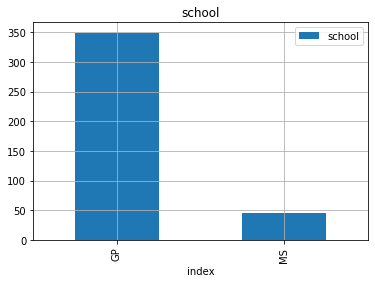

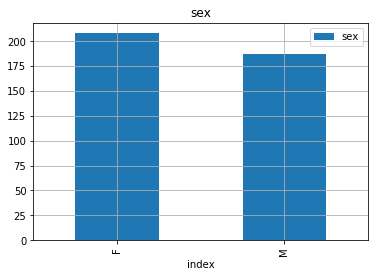

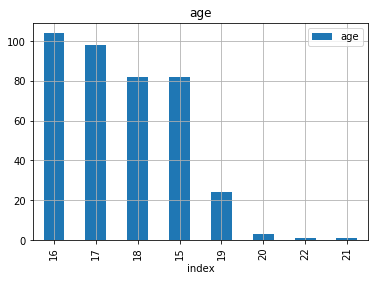

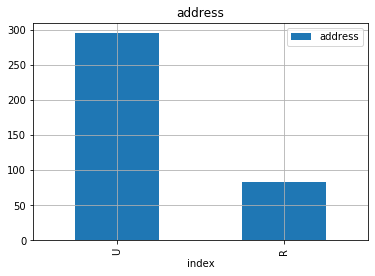

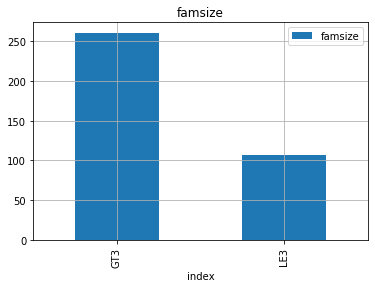

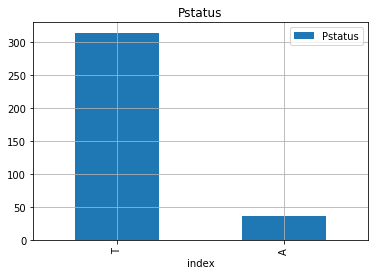

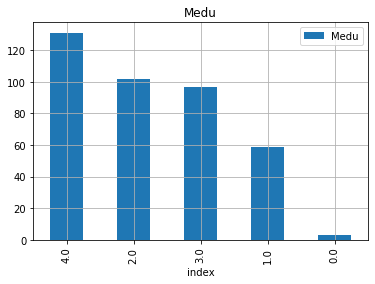

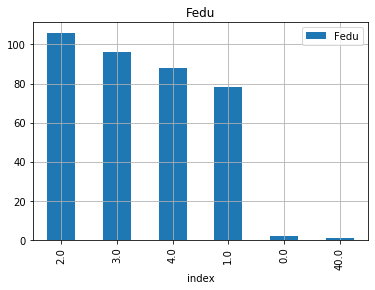

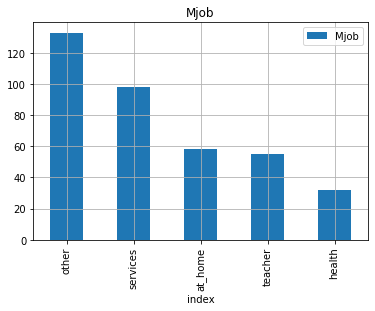

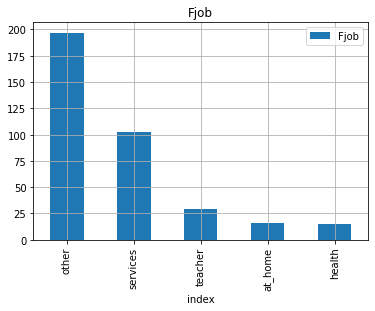

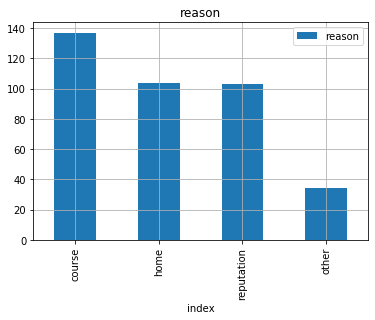

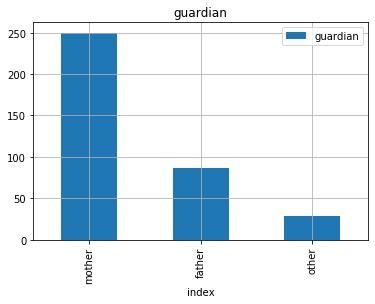

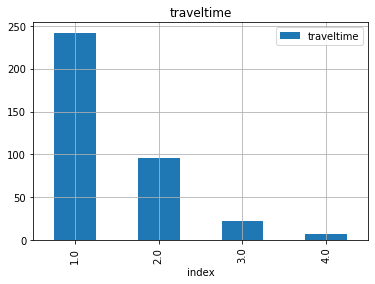

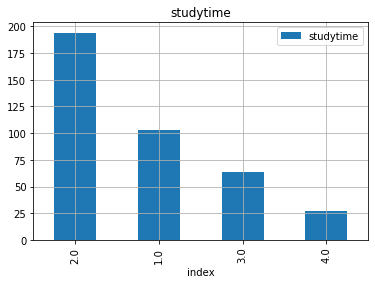

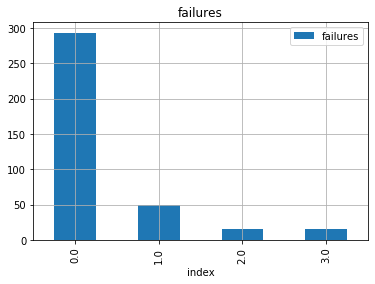

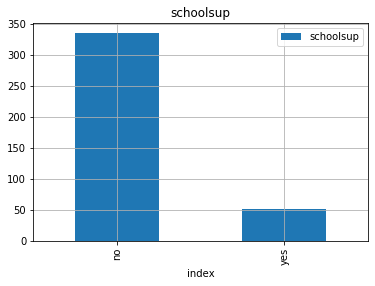

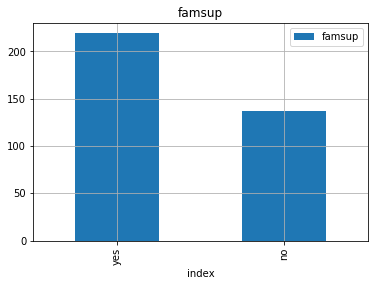

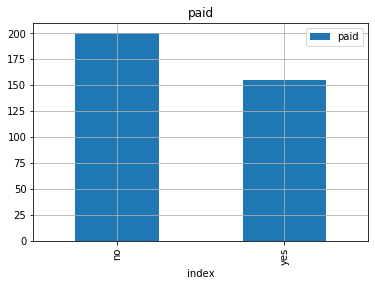

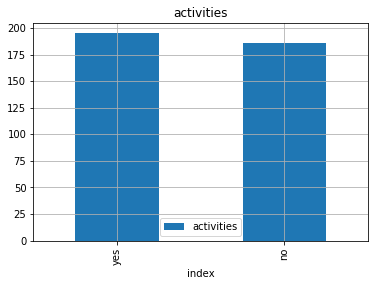

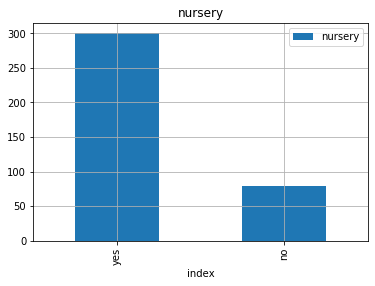

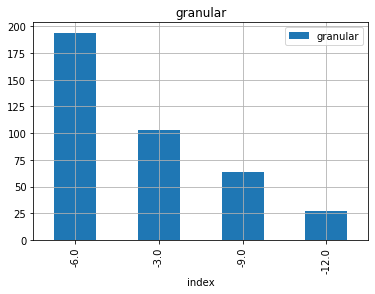

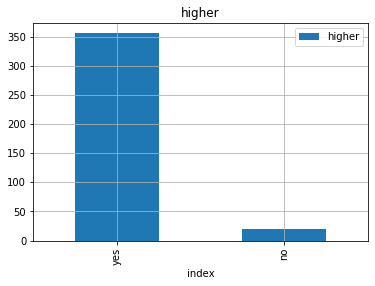

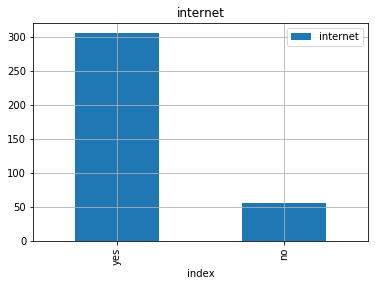

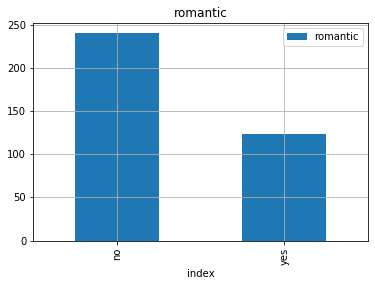

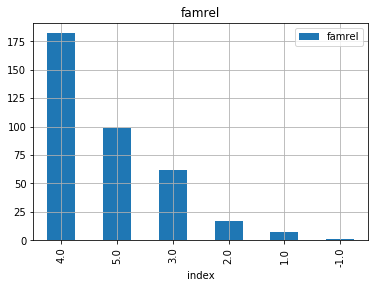

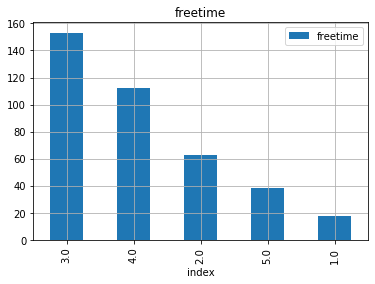

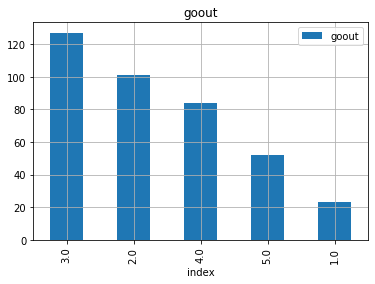

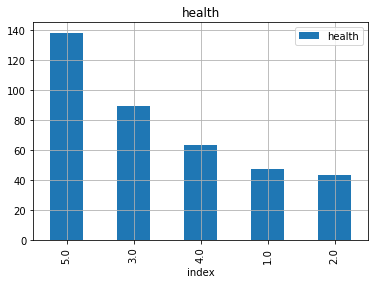

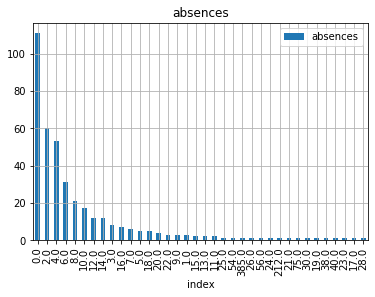

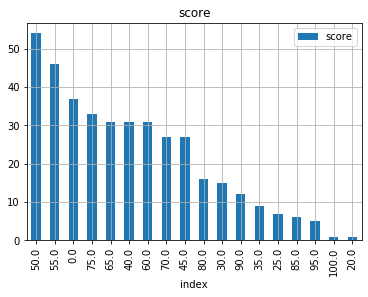

In [9]:
#  build graphs of distribution by characteristics in the context of columns

for column in schoolchild.columns:
    bar_graph(column)


### Вывод
   1. В целом значения в столбцах такие же как в описании, кроме столбца Fedu и famrel. Основное предположение это опечатки в Fedu надо от значения 40 ублать 0, в столбце famrel убрать -1. 
   2. Столбец granular является лишним в таблице и требует удаления.
   3. Изменить структуру данных в столбце failures 0 - это значение 0, 1-3 - это значение 1.
   

In [10]:
schoolchild.loc[schoolchild.Fedu == 40, 'Fedu'] = 4 # замена ошибочного значения

schoolchild.loc[schoolchild.famrel == -1, 'famrel'] = 1 # замена ошибочного значения

schoolchild = schoolchild.drop('granular', axis = 1) # удаление лишнего столбца

schoolchild['failures'] = schoolchild['failures'].apply(lambda x: 0 if x == 0 else 1) # изменение структуры данных в столбце failures


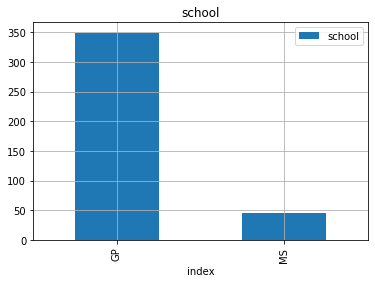

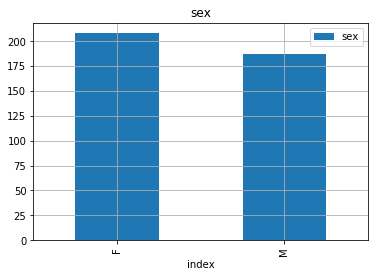

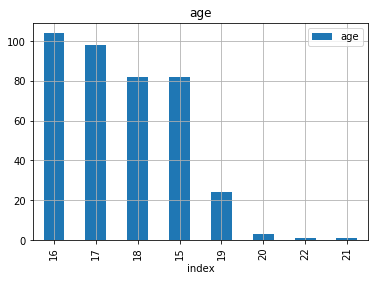

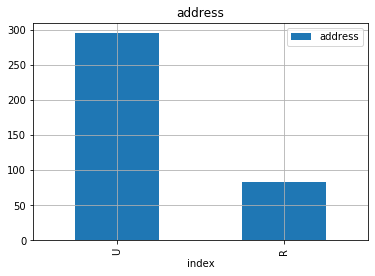

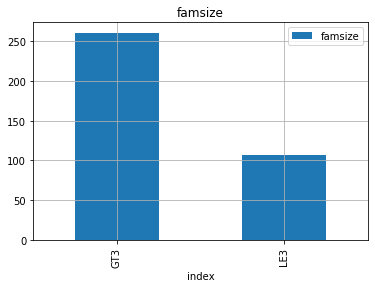

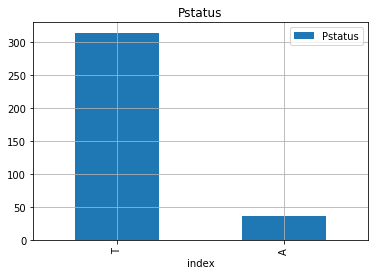

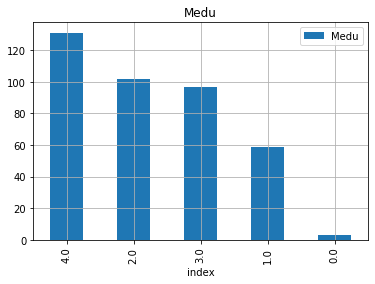

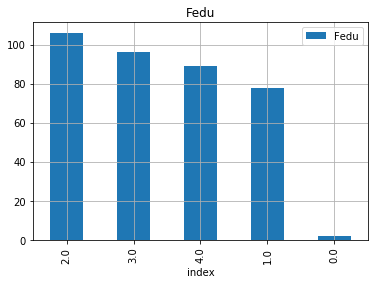

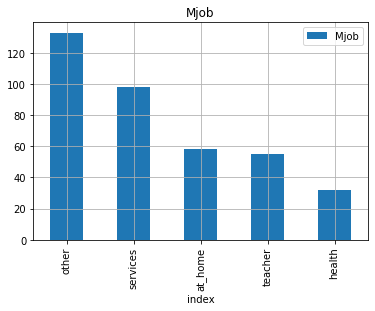

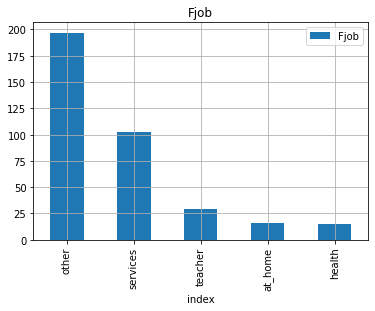

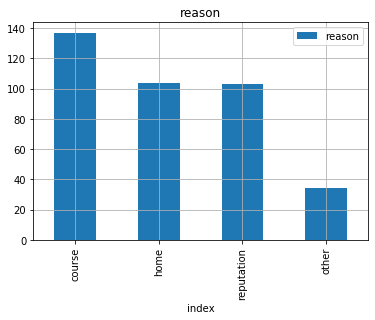

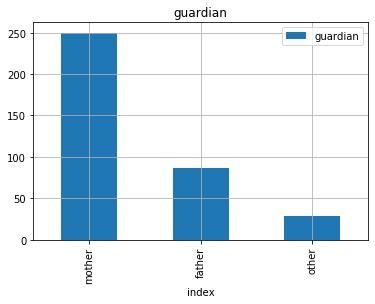

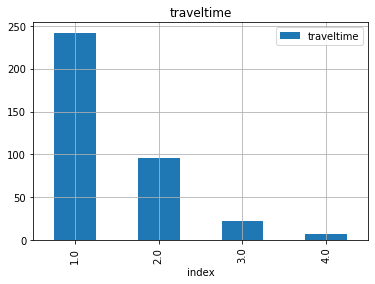

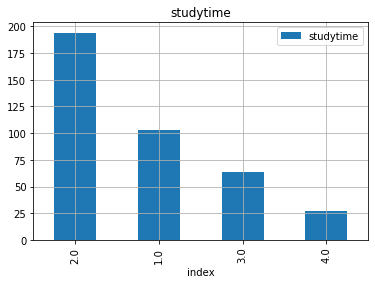

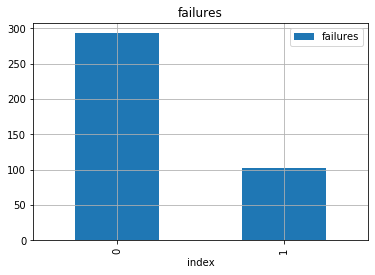

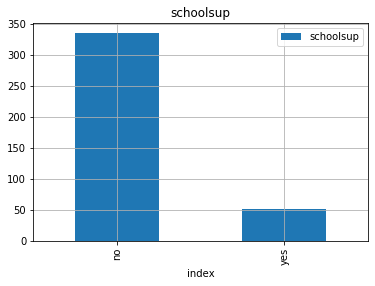

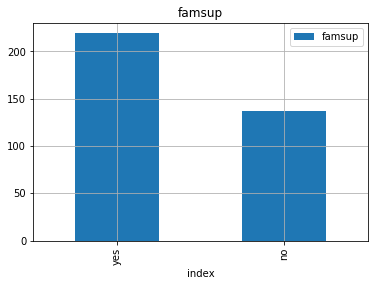

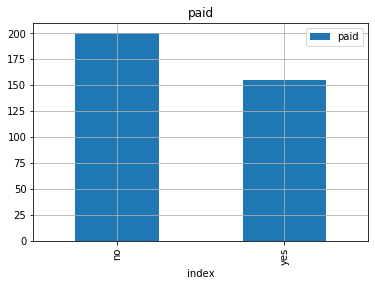

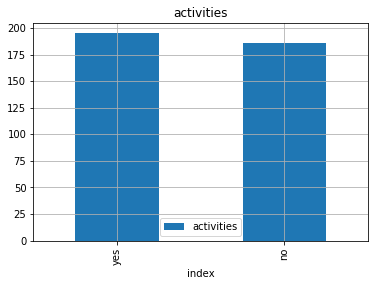

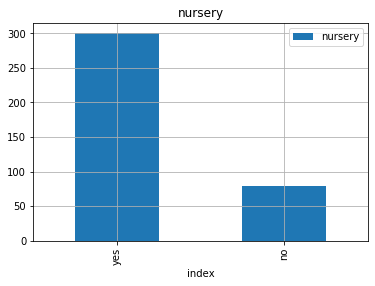

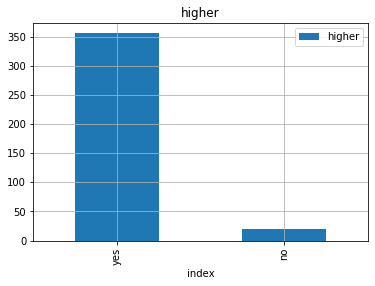

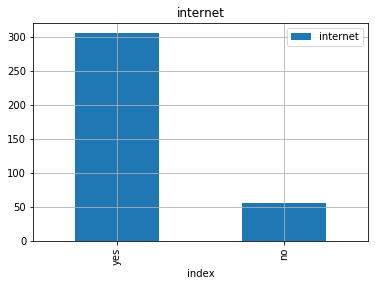

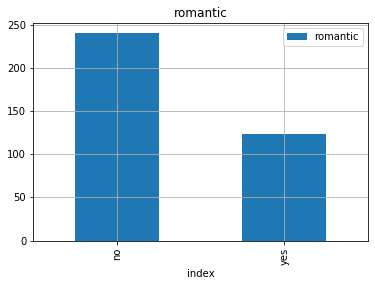

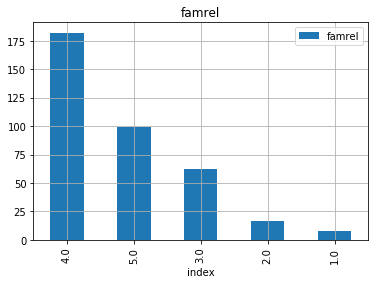

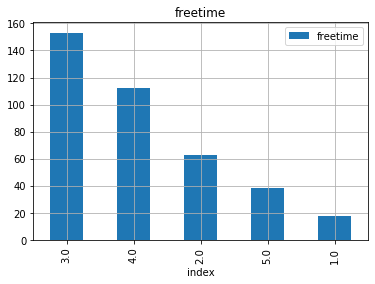

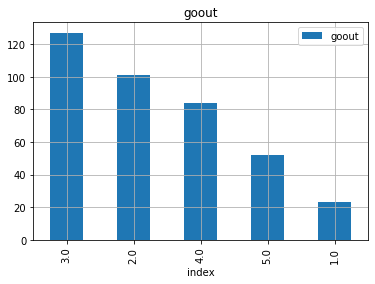

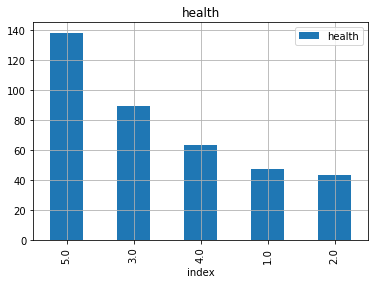

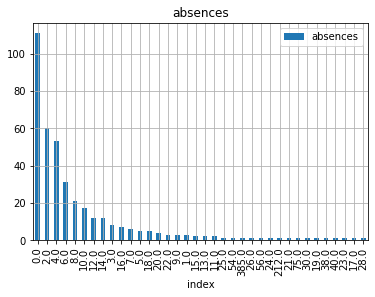

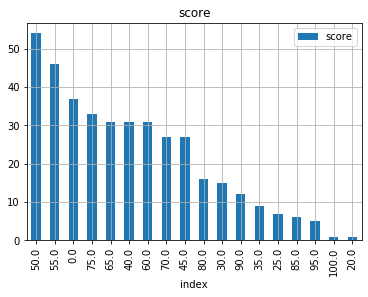

In [11]:
#  сhecking the change

for column in schoolchild.columns:
    bar_graph(column, schoolchild)

In [12]:
# getting rid of outliers in the age, absences and score columns

for column in ['age', 'absences', 'score']:
    
    median = schoolchild[column].median() # определяем медианное значение в столбике 
    
    IQR = schoolchild[column].quantile(0.75) - schoolchild[column].quantile(0.25) # расчитываем межквартильный размах
    
    perc25 = schoolchild[column].quantile(0.25)
    perc75 = schoolchild[column].quantile(0.75)
    
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    
    # we cut off data outliers in columns
    
    schoolchild = schoolchild[(schoolchild[column] >= perc25 - 1.5*IQR) & (schoolchild[column] <= perc75 + 1.5*IQR)] 

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


In [13]:
# Convert nominative variable values from string values to numeric

# create a dictionary for translating string values into digital

dict_all = {} 

# Loop creating a dictionary for converting string data to numeric 

for column in schoolchild.describe(include=['O']).columns:
    
    dict_column = {} # создатим словарь перевода данных в числовые
    count = 0
    
    # filling the dictionary data by column
    
    for element in schoolchild[column].unique(): 
        if type(element) != float:
            dict_column[element] = count
            count += 1
    
    dict_all[column] = dict_column # заполняем словарь
    
    # convert string data to numeric
    
    schoolchild[column] = schoolchild[column]. \
    apply(lambda x: dict_column[x] if type(x) != float else None)  

In [14]:
dict_all

{'school': {'GP': 0, 'MS': 1},
 'sex': {'F': 0, 'M': 1},
 'address': {'U': 0, 'R': 1},
 'famsize': {'GT3': 0, 'LE3': 1},
 'Pstatus': {'A': 0, 'T': 1},
 'Mjob': {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4},
 'Fjob': {'teacher': 0, 'other': 1, 'health': 2, 'services': 3, 'at_home': 4},
 'reason': {'course': 0, 'other': 1, 'home': 2, 'reputation': 3},
 'guardian': {'mother': 0, 'father': 1, 'other': 2},
 'schoolsup': {'yes': 0, 'no': 1},
 'famsup': {'no': 0, 'yes': 1},
 'paid': {'no': 0, 'yes': 1},
 'activities': {'no': 0, 'yes': 1},
 'nursery': {'yes': 0, 'no': 1},
 'higher': {'yes': 0, 'no': 1},
 'internet': {'yes': 0, 'no': 1},
 'romantic': {'no': 0, 'yes': 1}}

In [15]:
# let's look at the basic descriptive statistics for the schoolchild table

schoolchild.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
count,360.000000,360.000000,360.000000,346.000000,338.000000,322.000000,357.000000,337.000000,344.000000,326.000000,343.000000,330.000000,332.000000,355.000000,360.000000,351.000000,326.000000,323.000000,346.000000,345.000000,342.000000,328.000000,330.000000,334.000000,353.000000,353.000000,345.000000,360.000000,360.000000
mean,0.119444,0.477778,16.622222,0.225434,0.292899,0.900621,2.756303,2.501484,2.142442,1.659509,1.440233,0.378788,1.442771,2.050704,0.238889,0.871795,0.619632,0.427245,0.526012,0.202899,0.043860,0.164634,0.330303,3.946108,3.243626,3.076487,3.562319,4.577778,52.027778
std,0.324762,0.500201,1.229424,0.418473,0.455767,0.299636,1.101325,1.091429,1.254752,1.105518,1.238426,0.603061,0.707988,0.858798,0.426998,0.334795,0.486224,0.495446,0.500046,0.402742,0.205083,0.371417,0.471036,0.915384,0.981430,1.106457,1.386092,4.959957,22.979325
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,4.000000,3.500000,55.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,7.000000,70.000000
max,1.000000,1.000000,21.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,20.000000,100.000000


In [16]:
# create a table of Pearson linear correlation coefficients

tab_corr = round(schoolchild.corr()*100)

# remove the maximum coefficients equal to 100%

for column in tab_corr.columns:
    tab_corr.loc[tab_corr[column] == tab_corr[column].max(), column] = 0

__Для столбцев guardian, schoolsup, higher заполнение буду проводить самостоятельно, т.к. существует появляется ошибка "cannot convert float NaN to integer", которую не могу исправить__. 

Для заполнения пропусков использую самое часто употребляемое значение: 
   - для столбца guardian - это _mother_ (значение 1);
   - для столбца schoolsup - это _no_ (значение 1);
   - для столбца higher - это _yes_ (значение 0).
   
Это значение равно медиане в числовом выражении 

In [17]:
# fill in the gaps in the guardian, schoolsup, higher columns based on moda

for column in ['guardian', 'schoolsup', 'higher']:
    mod = schoolchild[column].mode()[0]
    for index in schoolchild[schoolchild[column].isnull()].index:
        schoolchild.loc[index, column] = mod

Простая замена пропусков в таблице на медиану, среднее или моду не всегда эффективна и может значительно изменить структуру данных. поэтому рассмотрим варианты замены на основе замены пар столбцев выбранных на основе коэффициентов корреляции. 

In [18]:
# we declare columns for filling in gaps

columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime',
       'failures', 'famsup', 'paid', 'activities', 'nursery',
    'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score']

columns_add = [] # create a list of columns for which this method of filling in the gaps is not suitable


for column in columns:
    
    if schoolchild[column].isna().sum() > 0: # check for passes
        
        if  tab_corr[column].max() >  abs(tab_corr[column].min()): # compare the maximum and minimum correlation values
       
            # define the column with the maximum value of the correlation coefficient 
    
            column_corr = tab_corr[tab_corr[column] == tab_corr[column].max()].index[0]
            
            # create an intermediate table with the values of the median and the mean column, 
            # the values of which must be filled in the section of the column 
            # with the maximum value of the correlation coefficient
            
            tt = schoolchild.groupby(column_corr).agg({column: ['median', 'mean']})
            
        else:
            
            # the column with the maximum negative correlation coefficient
            
            column_corr = tab_corr[tab_corr[column] == tab_corr[column].min()].index[0]
            
            # create an intermediate table with the values of the median and 
            # the mean column, the values of which must be filled in the section of 
            # the column with the minimum value of the correlation coefficient
            
            tt = schoolchild.groupby(column_corr).agg({column: ['median', 'mean']})
            
        tt.columns = ['median', 'mean']
        
        tt = tt.reset_index()
        
        tt['mean'] = tt['mean'].apply(lambda x: round(x))
        
        tt['delta'] = tt['mean'] - tt['median'] # create a check column
        
        # checking for the possibility of filling in the missing data
        
        
        if tt[tt.delta != 0]['delta'].count() == 0:
            
            # replace missing values
            
            tts = schoolchild[schoolchild[column].isnull()]
            
            for row in tts.index:
                
                
                try:
                    
                    index = tt[tt[column_corr] == schoolchild.loc[row, column_corr]].index[0]
                    schoolchild.loc[row, column] = tt.loc[index, 'median']
                    
                except:

                    continue 
            
            
        else:
            columns_add.append(column)   

In [19]:
columns_add # let's see which columns are not filled

['Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'nursery',
 'famrel',
 'freetime',
 'goout']

In [20]:
schoolchild.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
count,360.000000,360.000000,360.000000,360.000000,355.000000,359.000000,357.000000,337.000000,344.000000,326.000000,343.000000,360.000000,360.000000,360.000000,360.000000,360.000000,357.00000,357.000000,360.000000,345.000000,360.000000,360.000000,360.000000,334.000000,353.000000,353.000000,360.000000,360.000000,360.000000
mean,0.119444,0.477778,16.622222,0.227778,0.278873,0.910864,2.756303,2.501484,2.142442,1.659509,1.440233,0.347222,1.430556,2.050000,0.238889,0.875000,0.59944,0.453782,0.541667,0.202899,0.041667,0.150000,0.302778,3.946108,3.243626,3.076487,3.555556,4.577778,52.027778
std,0.324762,0.500201,1.229424,0.419982,0.449078,0.285338,1.101325,1.091429,1.254752,1.105518,1.238426,0.586755,0.692708,0.852818,0.426998,0.331179,0.49070,0.498558,0.498954,0.402742,0.200104,0.357568,0.460099,0.915384,0.981430,1.106457,1.360903,4.959957,22.979325
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,0.000000,0.000000,17.000000,0.000000,0.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,4.000000,3.500000,55.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,7.000000,70.000000
max,1.000000,1.000000,21.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,20.000000,100.000000


Столбцы _'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'famrel', 'freetime', 'goout'_ предлагаю заполнять __модой__

In [21]:
# fill in the missing data with mode

for column in columns_add:
    
    schoolchild[column] = schoolchild[column]. \
    fillna(schoolchild[column].value_counts().index[0])

In [22]:
schoolchild.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 29 columns):
school        360 non-null int64
sex           360 non-null int64
age           360 non-null int64
address       360 non-null float64
famsize       355 non-null float64
Pstatus       359 non-null float64
Medu          360 non-null float64
Fedu          360 non-null float64
Mjob          360 non-null float64
Fjob          360 non-null float64
reason        360 non-null float64
guardian      360 non-null float64
traveltime    360 non-null float64
studytime     360 non-null float64
failures      360 non-null int64
schoolsup     360 non-null float64
famsup        357 non-null float64
paid          357 non-null float64
activities    360 non-null float64
nursery       360 non-null float64
higher        360 non-null float64
internet      360 non-null float64
romantic      360 non-null float64
famrel        360 non-null float64
freetime      360 non-null float64
goout         360 non-null f

После всех операций остались пропуски в столбцах _famsize, Pstatus, famsup, paid_. Заполним пропуски наиболее часто встречающимся элементом.

In [23]:
# replacement of missing data

for column in schoolchild.columns:
    
    schoolchild[column] = schoolchild[column].fillna(schoolchild[column].value_counts().index[0])

In [24]:
schoolchild.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 394
Data columns (total 29 columns):
school        360 non-null int64
sex           360 non-null int64
age           360 non-null int64
address       360 non-null float64
famsize       360 non-null float64
Pstatus       360 non-null float64
Medu          360 non-null float64
Fedu          360 non-null float64
Mjob          360 non-null float64
Fjob          360 non-null float64
reason        360 non-null float64
guardian      360 non-null float64
traveltime    360 non-null float64
studytime     360 non-null float64
failures      360 non-null int64
schoolsup     360 non-null float64
famsup        360 non-null float64
paid          360 non-null float64
activities    360 non-null float64
nursery       360 non-null float64
higher        360 non-null float64
internet      360 non-null float64
romantic      360 non-null float64
famrel        360 non-null float64
freetime      360 non-null float64
goout         360 non-null f

In [25]:
# checking data for duplicates

schoolchild.duplicated().sum()

0

Дубликаты в данных отсуствуют

Вывод
------
   1. Заполненны пропуски в таблице.
   2. Исправлены данные.
   3. Таблица очищина от выбросов.  

# 3. Анализ данных
   - Провести корреляционный анализ
   - Провести анализ номиативных данных
   - Выявить факторы, оказывающие существенное влияние на конечную оценку
   - выделить кластеры 

In [26]:
schoolchild.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'score'],
      dtype='object')

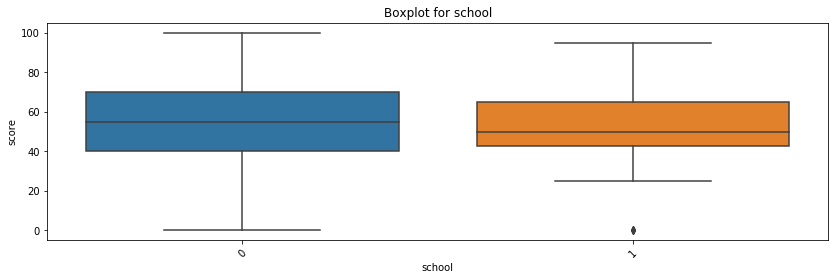

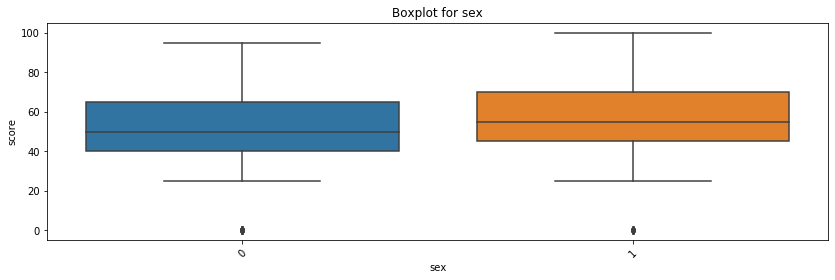

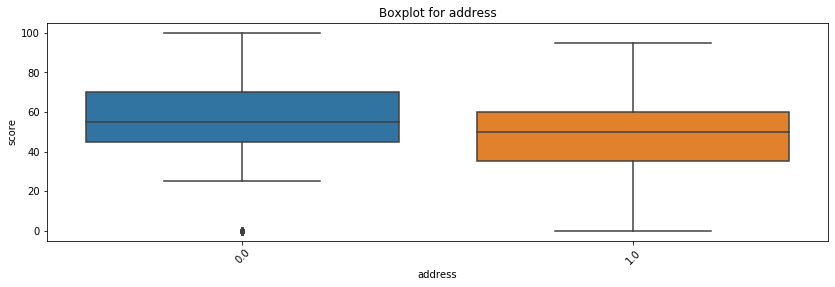

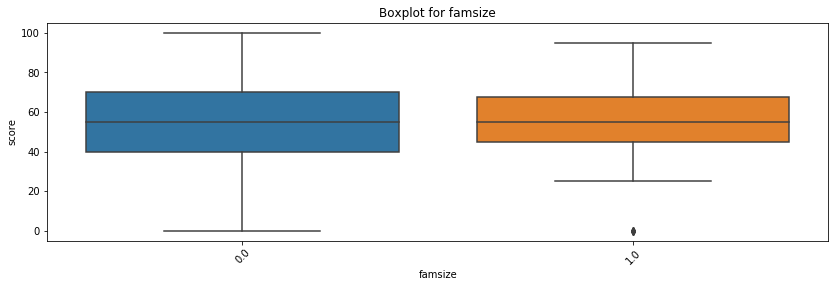

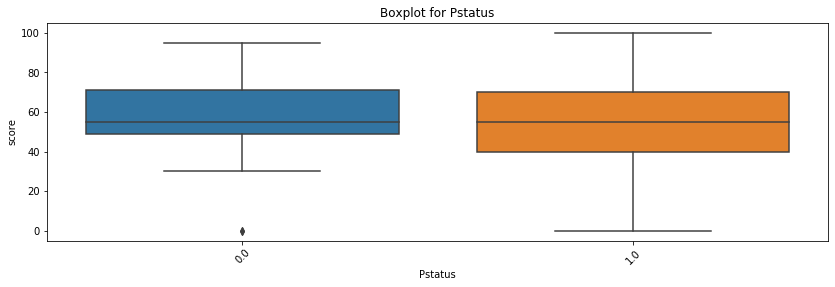

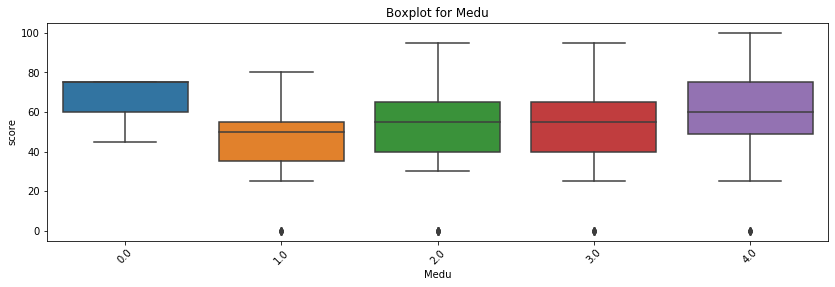

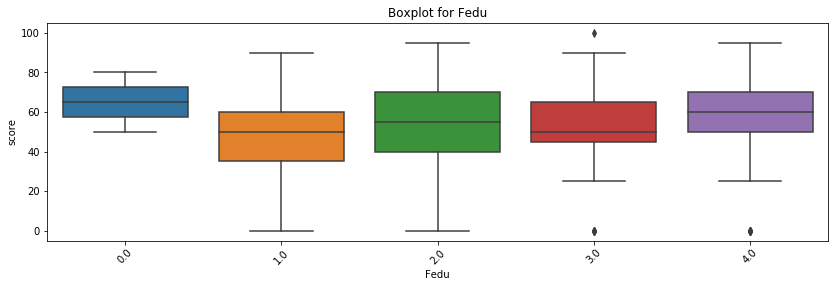

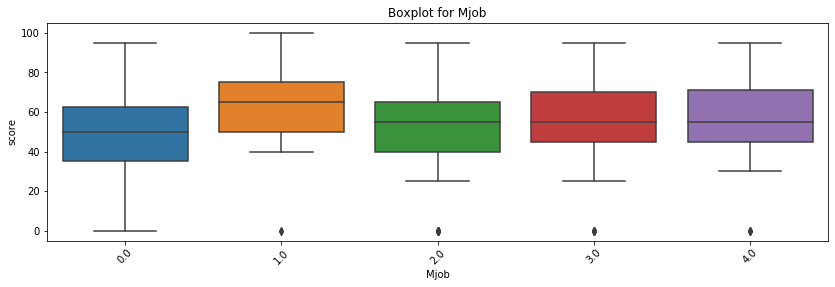

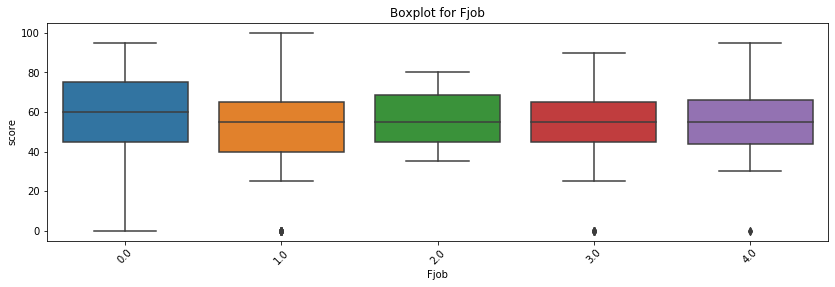

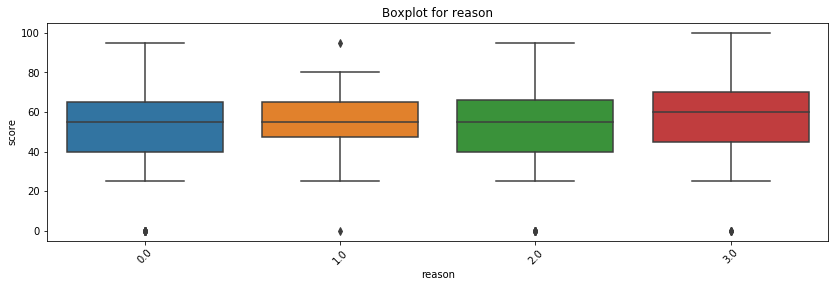

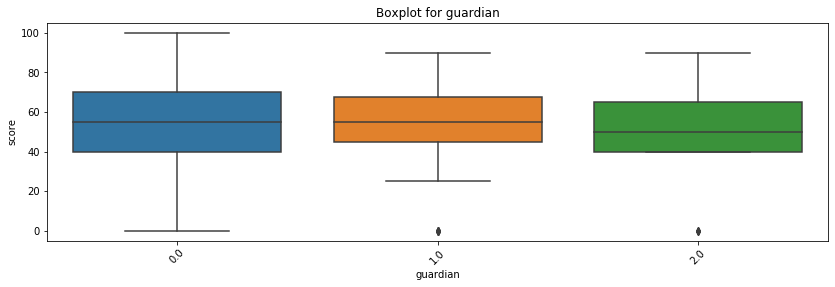

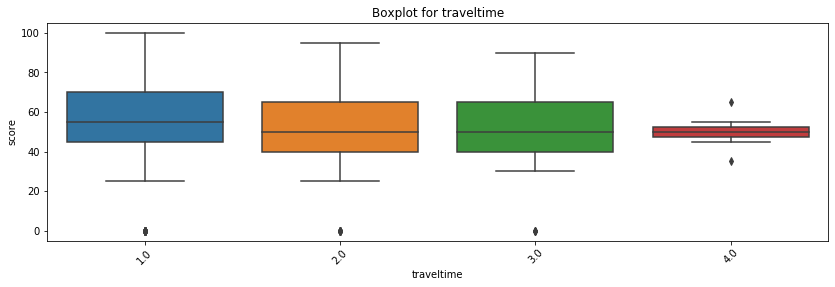

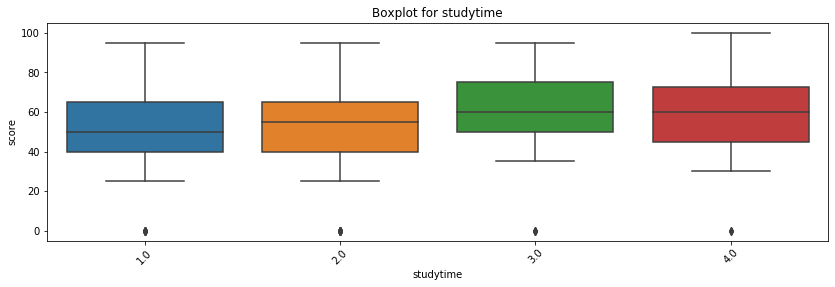

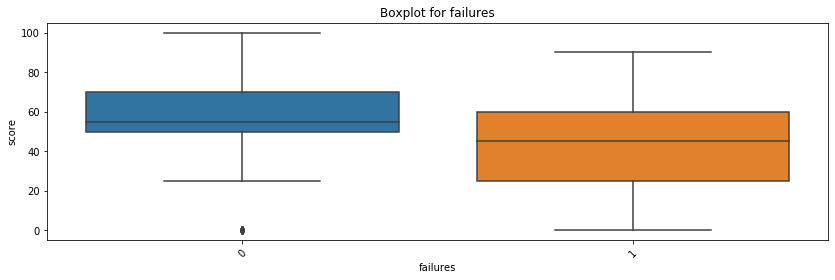

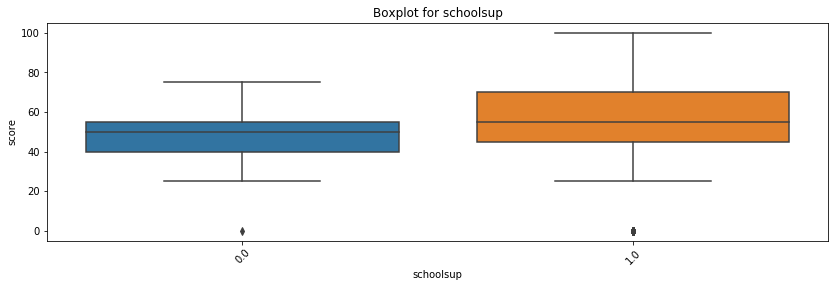

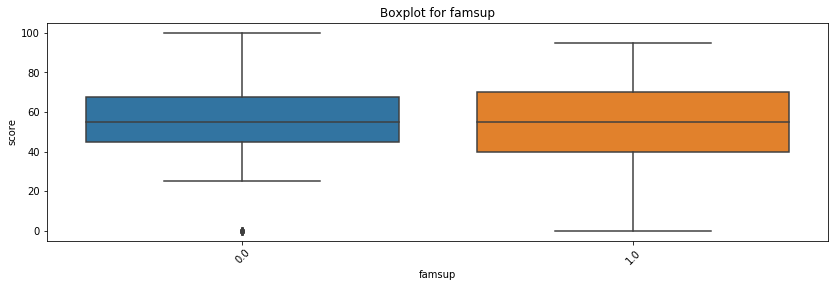

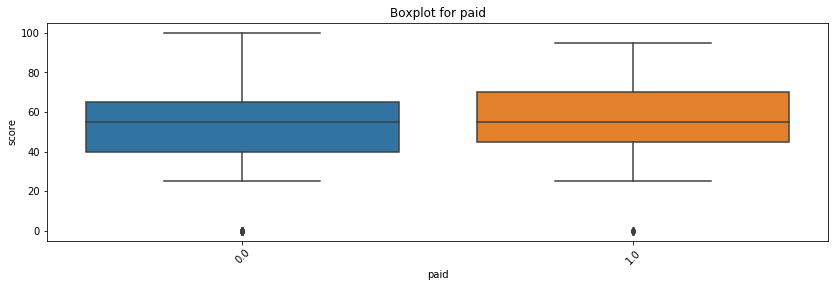

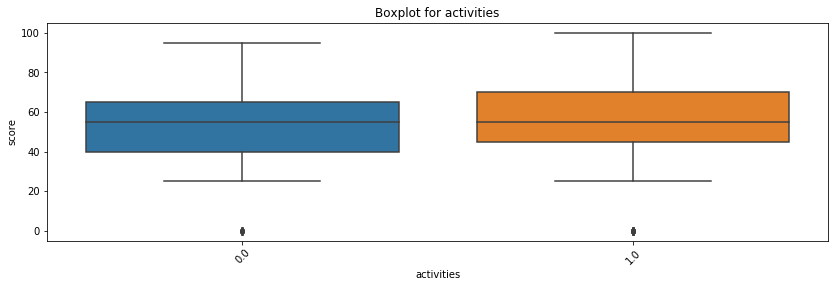

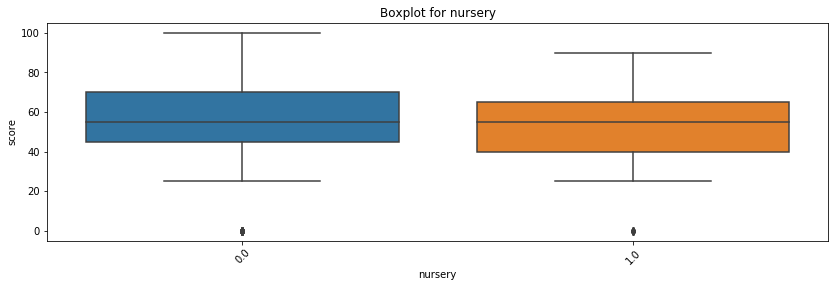

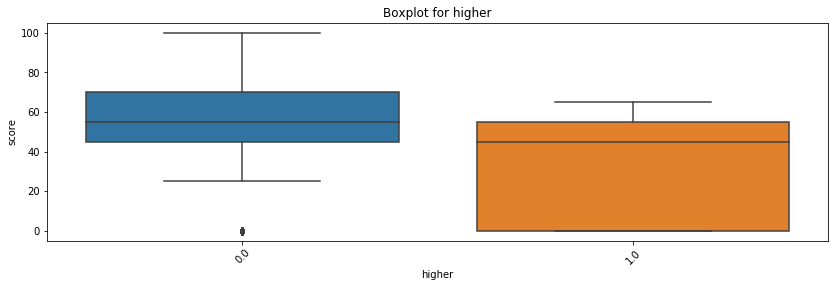

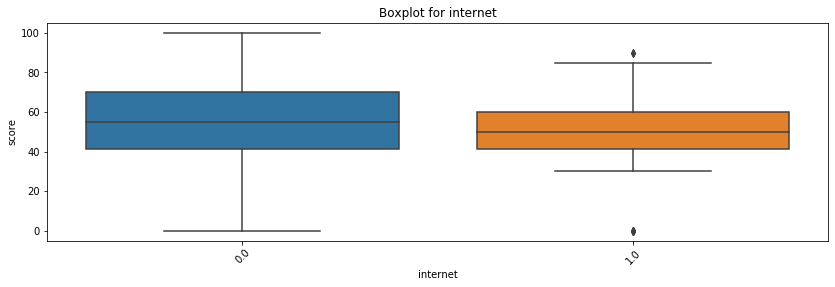

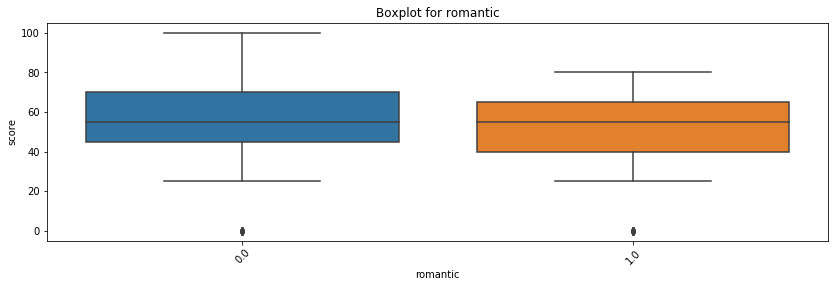

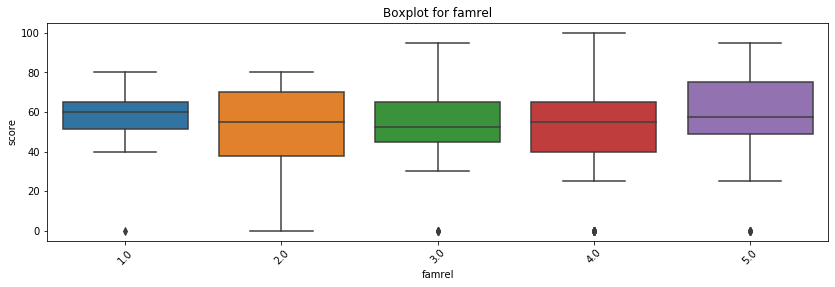

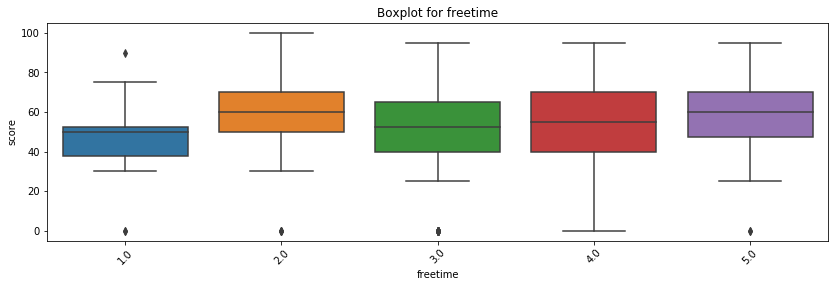

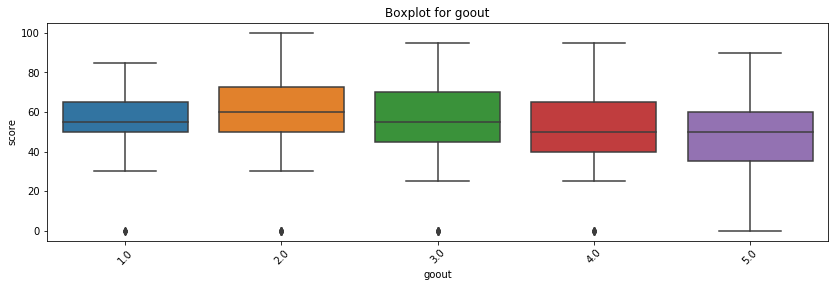

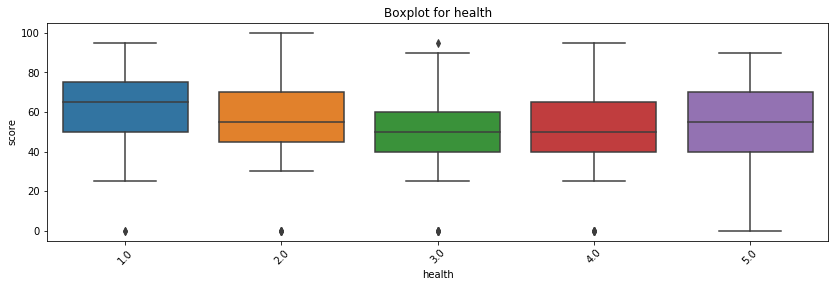

In [27]:
# make boxplot and rate them


all_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']

for column in all_columns:
    bar_graph(column, schoolchild, 1)

Вывод:
------
  1. Медианная оценка по математике учащихся школы GP, чем в школе MS. Однако в школе MS, у школьников наблюдается более стабильные оценка. В данном случае может быть ошибка т.к. учеников из школы MS меньше более чем в сем раз;
  2. В целом мужчины получают более высокие оценки, чем женщины;
  4. В целом ребята из города сдают лучше, чем ребята, живущие за городом. При этом стоит отметить более высокий разброс в оценке среди ребят, живущих в городе. Однако может быть ошибка т.к. количество городских школьников в 3.4 раза больше чем живущих за городом
  5. В целом ребята из из семей с разным количеством сдают госсэкзамен по математике приблезительно одинаково. Для тех ребят у которых семьи больше 3 человек меньше разброс, но это связано с количеством выборки;
  6. При оценки совместного проживания родителей средняя оценка медианная оценка получилось похожей;
  7. Матери с высшем образованием, стимулируют своих детей лучше сдавать государственный экзамен по математике;
  8. Образование отцев также влияет на качество оценки по государственному экзамену;
  9. Матери работающие в сфере здравоохранения лучше стимулируют своих детей к качеству сдачи экзамена по математике;
  10. Сфера работы отцев не оказывает существенного влияния на оценку по экзамену по математике;
  11. Репутация школы влияет на оценку по госэкзамену по матиматике;
  12. Для более качественной оценки по экзамену, лучше, что бы опекуном был кто-то из родителей;
  13. Время в пути от дома до школы не влияет на оценку;
  14. Дети, которые занимаются дополнительно внешколы, лучше здают экзамен
  15. Дети, у которых нет внеучебных неудач, лучше сдают экзамен
  16. Дети, с дополнительной образовательной поддержкой в школе, сдают экзамен хуже;
  17. Дополнительна образовательная поддержка родитлей, сильно не влияет на оценки по экзамену;
  18. Дополнительные платные занятия в улучшают оценку, но среднюю оставляют приблезительно одинаковую;
  19. Дополнительные занятия повышает верхнюю границу оценок, но оставляет медианное значение одиноковым;
  20. Посещение детского сада увеличивает верхние границы оценок, но среднее значение оценок остается одинаковым с теми детьми, которые не посещали;
  21. Дети, которые приняли решение о поступлении, имеют более высокий верхний предел оценок по математике, от детей которые не планируют поступать;
  22. Интернет помогает получать более высокие оценки;
  23. Роматические чувства мешают обучению математике;
  24. Дети с очень плохими и очень хорошими отношениями учаться лучше чем условно "нейтральные";
  25. Дети у которых есть сводбодное время, лучше чем которые его нет;
  26. Без друзей плохо, но и много времени проведенного с друзьями тоже плохо, в данном вопросе лучше умеренное общение;
  27. Дети с проблемами со здоровьем в целом учаться лучше;
  
В целом можно сказать, что по отдельности факторы не оказывают существенного влияния на оценку по госэкзамену. Однако, наблюдается некая синергия, которая объединяя факторы, влияет на итоговый результат.

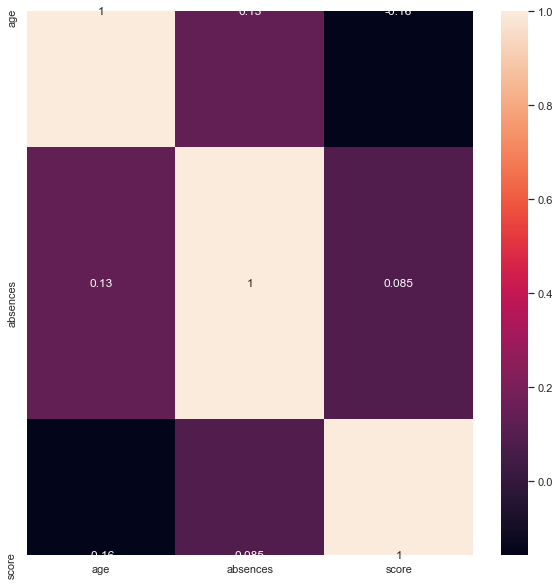

In [28]:
# make a table of correlation coefficients

corr = schoolchild[['age','absences', 'score']].corr()

# let's build a heatmap
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(corr, annot=True)

Вывод:
------
   1. Существенного влияния на итоговый результат не оказывает не один из факторов

# 4. Построение регрессии и анализ коэффициентов при столбцах

In [29]:
# split the schoolchild table into predicted data and parameters

features = schoolchild.drop(['score'], axis=1)

target = schoolchild['score']

In [30]:
# train the logistic regression model

model = LinearRegression()

model.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# let's see how the studied parameters affect the final result

pd.DataFrame(features.columns, model.coef_)

,0
5.058383,school
7.052343,sex
-2.875399,age
-4.737532,address
3.484672,famsize
-1.848788,Pstatus
2.829978,Medu
-0.079762,Fedu
-1.231877,Mjob
0.615818,Fjob


Вывод
------
   1. значительный вклад в оценку вносит школа, пол, количество дополнительных занятий всех форм (школьных, семейных, платных), количество неудач (но это скорее как косвенный фактор, подтверждающий несдачу), желание получить высшее образование, возможно как-то будет влиять absences и age, но их необходимо дополнительно обработать (нормализовать). 

# 5. Выделим кластера из данных и их анализ

In [32]:
# train the model

sc = StandardScaler()

X_sc = sc.fit_transform(schoolchild)

linked = linkage(X_sc, method = 'ward')

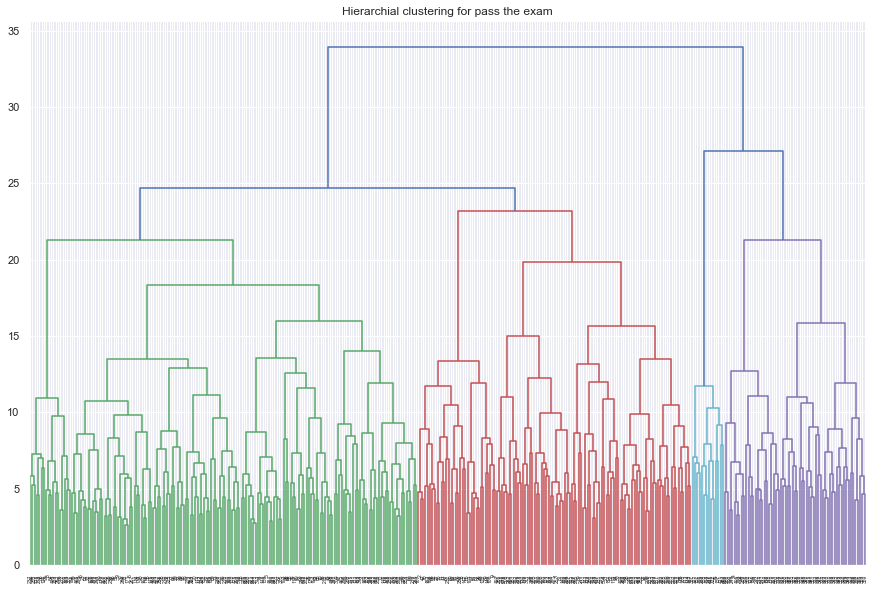

In [33]:
# build a dendogram and determine the number of clusters

plt.figure(figsize=(15, 10))  

dendrogram(linked)

plt.title('Hierarchial clustering for pass the exam')

plt.show()

In [34]:
# Select 4 clusters

km = KMeans(n_clusters = 4)

labels = km.fit_predict(X_sc)

schoolchild['cluster_km'] = labels

In [35]:
# determine the average values of indicators for clusters

claster_group = schoolchild.groupby(['cluster_km']).mean()

In [36]:
claster_group

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
cluster_km,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.216981,16.452830,0.283019,0.179245,0.896226,2.094340,2.037736,1.415094,1.509434,1.235849,0.254717,1.452830,2.207547,0.160377,0.783019,0.669811,0.462264,0.405660,0.245283,0.000000,0.283019,0.254717,3.801887,2.915094,2.849057,3.349057,4.103774,46.556604
1,0.006803,0.605442,16.108844,0.088435,0.292517,0.897959,3.557823,3.061224,2.741497,1.476190,1.605442,0.251701,1.224490,2.170068,0.081633,0.904762,0.721088,0.578231,0.666667,0.108844,0.006803,0.040816,0.244898,4.040816,3.197279,2.959184,3.557823,4.244898,62.278912
2,0.000000,0.661538,17.200000,0.184615,0.353846,0.923077,2.323077,2.000000,2.061538,1.784615,1.338462,0.723077,1.523077,1.661538,0.707692,0.876923,0.353846,0.169231,0.600000,0.230769,0.184615,0.123077,0.446154,4.061538,3.815385,3.738462,3.953846,6.861538,39.538462
3,1.000000,0.404762,17.952381,0.642857,0.333333,0.976190,2.380952,2.214286,1.952381,1.952381,0.952381,0.333333,1.952381,1.833333,0.261905,1.000000,0.404762,0.404762,0.357143,0.309524,0.047619,0.238095,0.404762,3.833333,3.309524,3.023810,3.452381,3.404762,49.285714


school


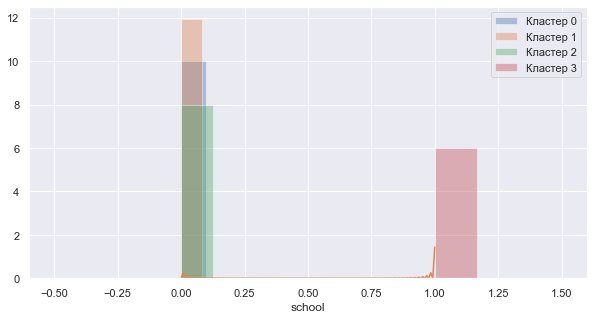

sex


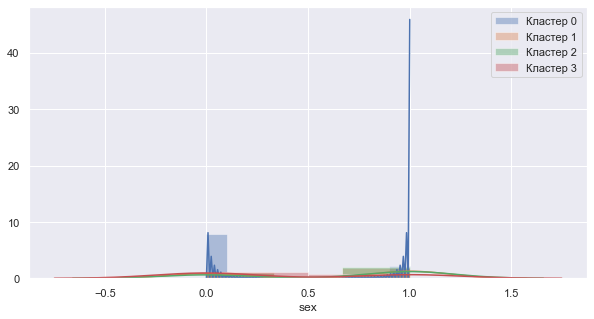

age


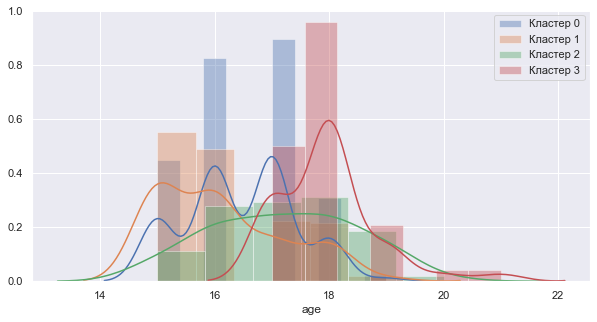

address


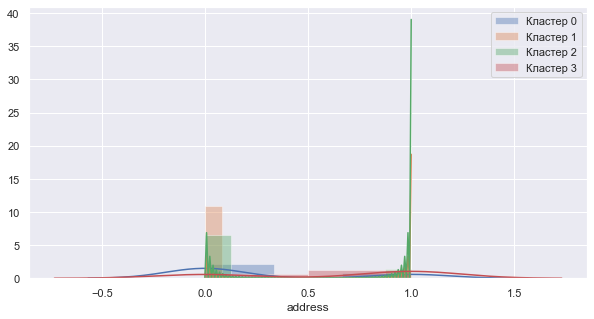

famsize


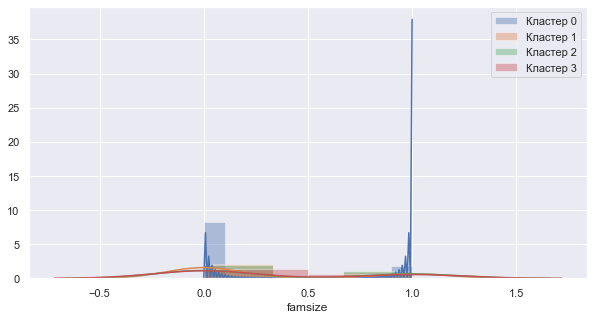

Pstatus


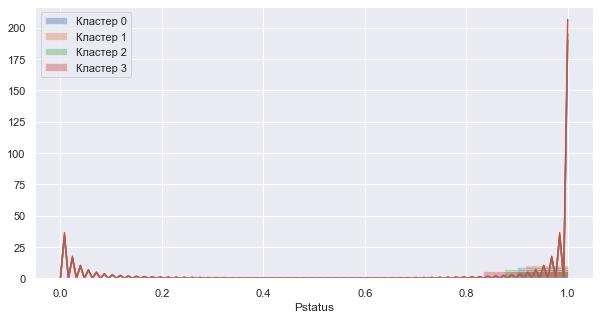

Medu


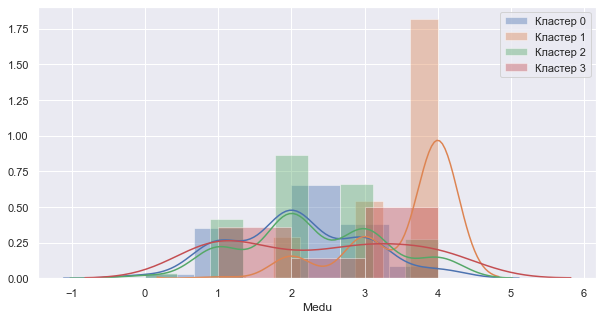

Fedu


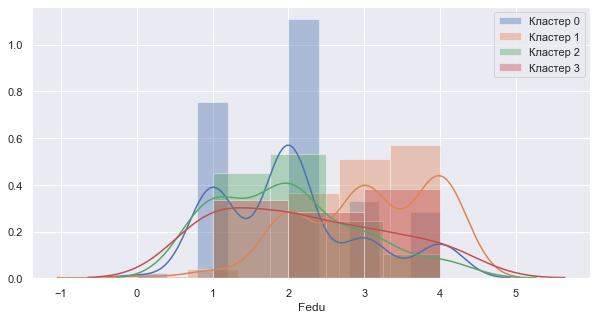

Mjob


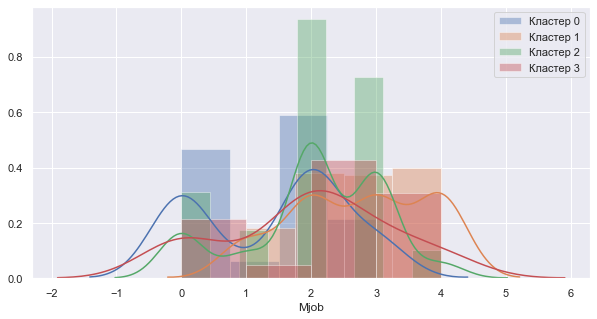

Fjob


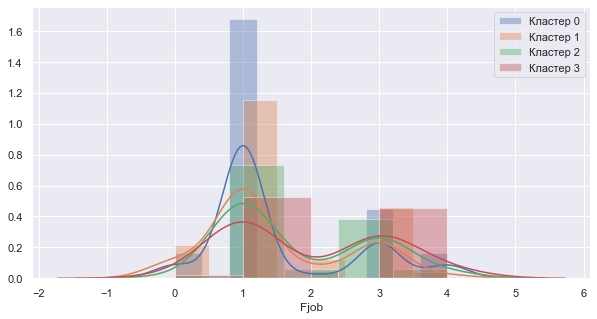

reason


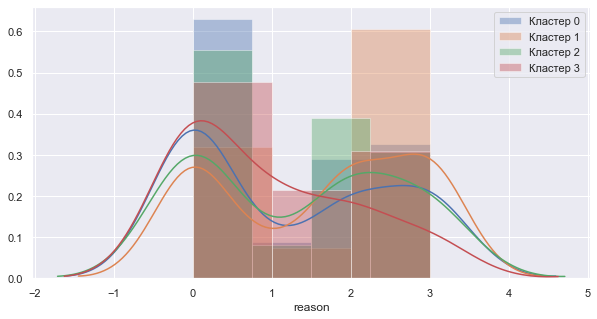

guardian


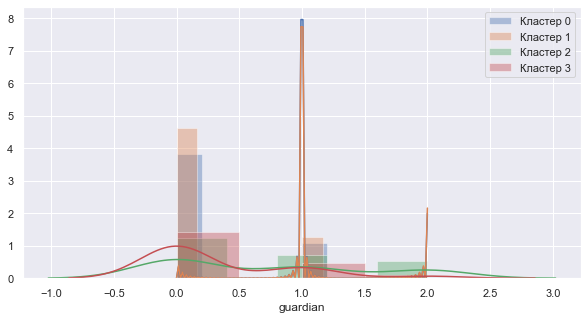

traveltime


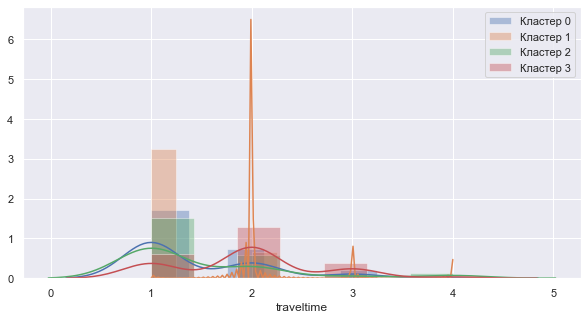

studytime


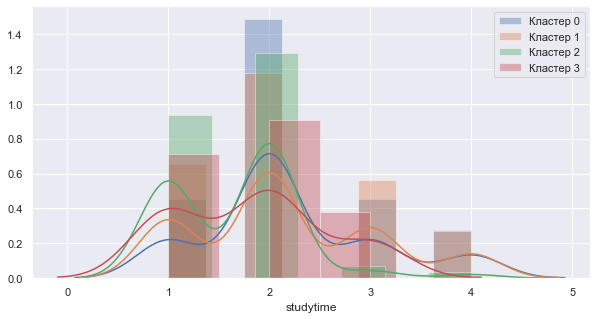

failures


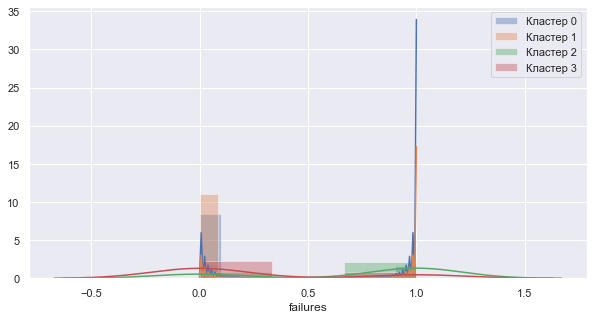

schoolsup


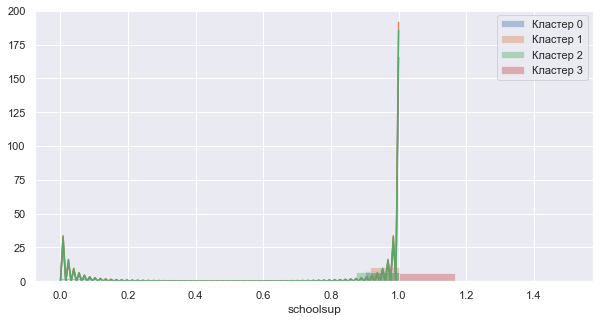

famsup


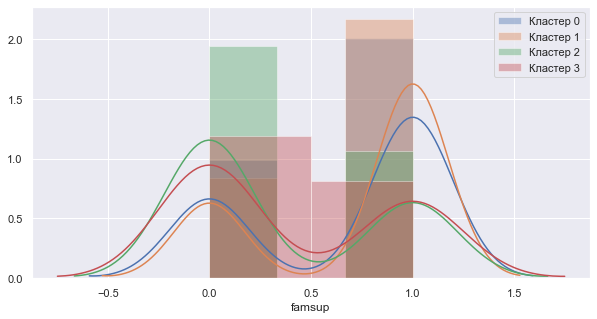

paid


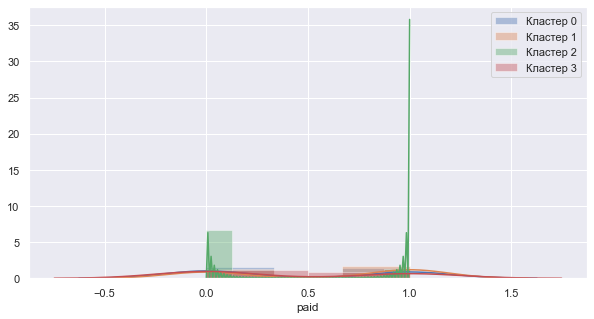

activities


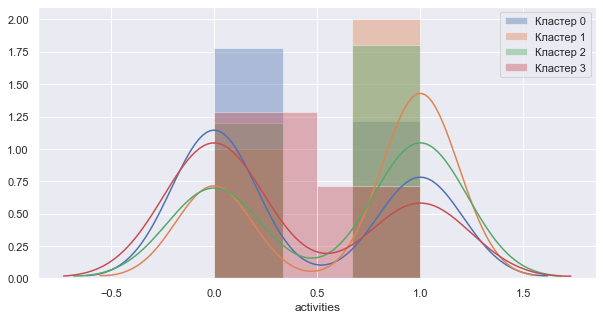

nursery


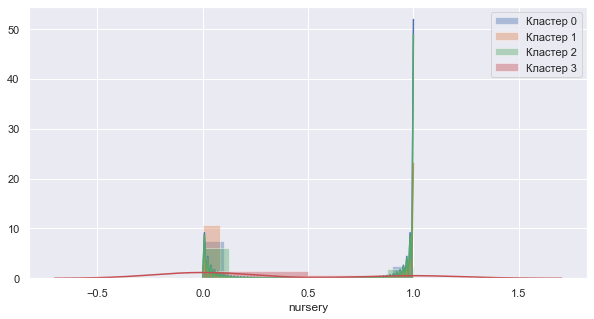

higher


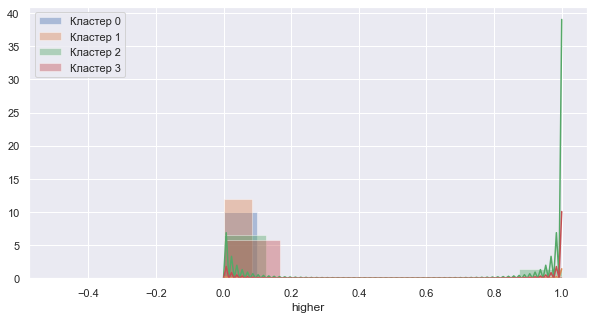

internet


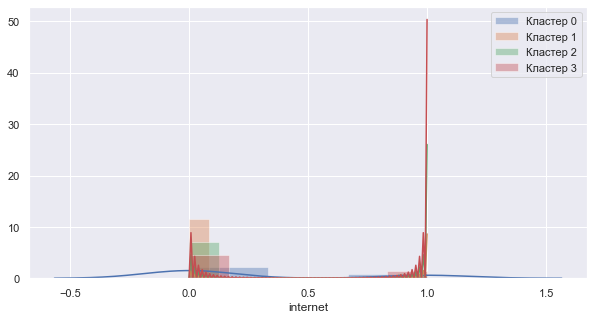

romantic


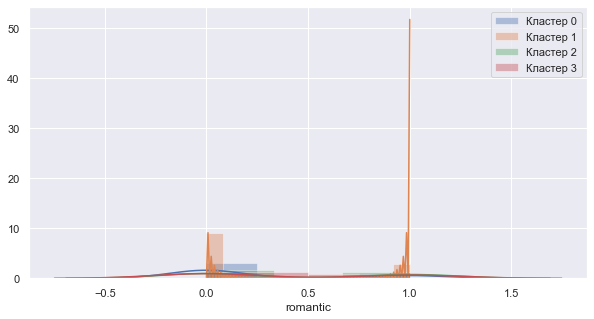

famrel


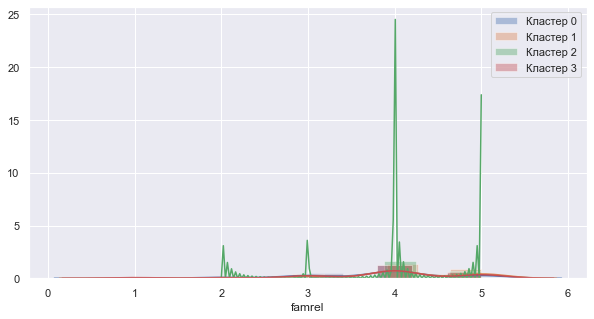

freetime


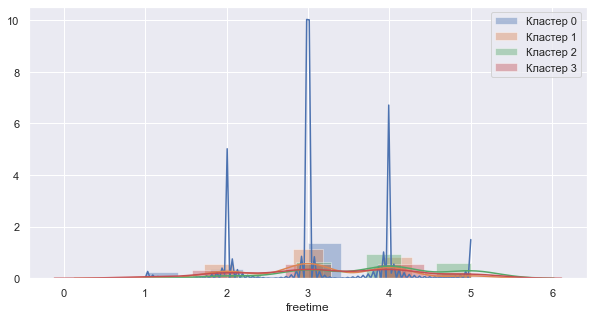

goout


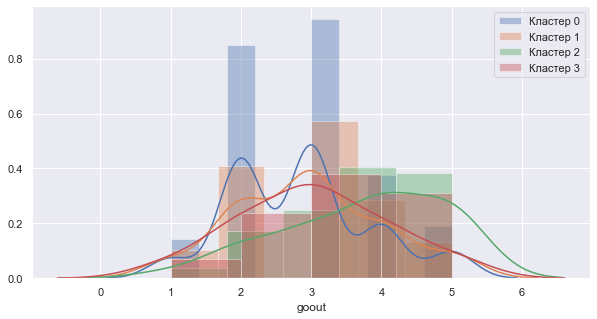

health


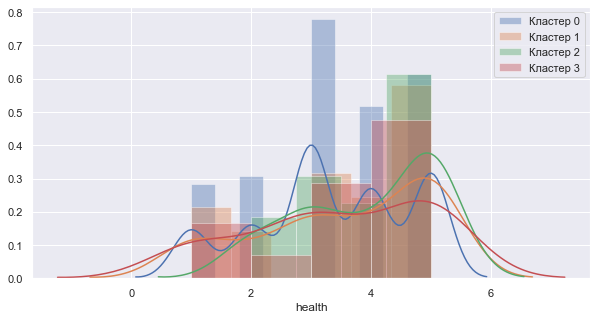

absences


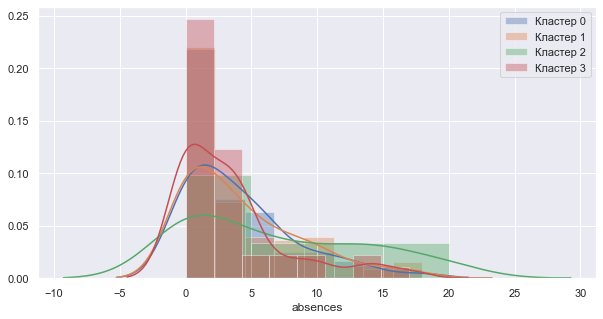

score


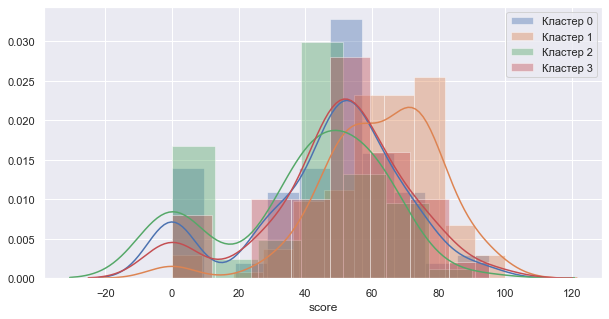

cluster_km


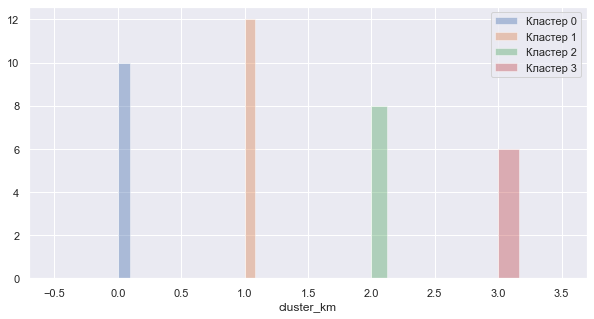

In [38]:
# Let's analyze the distribution of features across clusters

for f in schoolchild.columns:
    print(f)
    plt.figure(figsize = (10, 5))
    for i in schoolchild['cluster_km'].unique():
        sns.distplot(schoolchild.query('cluster_km == @i')[f], label='Кластер {}'.format(i))
    legend = plt.legend()
    
    
    plt.show()
    #plt.close(fig)

Вывод:
------
   1. Кластер № 0 Оценка по экзамену расспределелна в диапазоне от 0 до 90, __средняя оценка 51.36__. Преимущественно - это ученики школы GP, мальчики, возраст в диапазоне от 15 до 19 (средний около 16), преимущественно проживающие в городе, в семье с одним ребенком, преимущественно родители проживают вместе, преимущественно родители имеют среднее специальное или высшее образование, матери в основном работают в сфера здравоохранения и на госслужбе, отцы преимущественно на государственной службе, основная причина выбора школы - это наличие курсов и репутация. Опекуном является мать, преимущественное время в пути не превышает 15 минут, много времени занимаются помимо школы, преимущественно не имеют внеучебных неудач, существует хорошая школьная и домашняя учебная поддержка, примерно половина из ребят платят за дополнительные занятия по математике и проводят дополнительные внеучебные занятия, дети из данной группы практически не посещали детский сад и точно не хотят получать высшего образования, у детей из данной группы слабый доступ к инернету, но треть имеет подружки или друга, у ребят очень хорошие взаимоотношения внутри семьи, есть достаточно много свободного времени и времени на встречу с друзьями, у ребят достоаточно хорошее здоровье и немного пропущенных занятийц.
   2. Кластер № 1. Оценка по экзамену самая высокая находится в диапазоне от 0 до 100 баллов (__средняя оценка около 62__). Преимущественно это ученики школы GP, девочки возраст в диапазоне от 15 до 19 лет (в среднем около 17), преимущественно живут в черте города, в семье с одним ребенком, родители живут вместе, опекуном выступает мать. Матери преимущественно имеют высшее образования, отцы имеют высшее, среднее или среднее специальное. Матери работают в сфере госслужбы, учетилями и другое, отцы заняты в других сферах, причина выбора школы - это наличие курсов, близость к дому, репутация. Школа находится в 15 минут от дома. Эти дети пользуются школьной и семейной поддержкой в меньшей степени таким детям необходимы платные занятия, дети активно занимаются во внеурочное время. У таких детей практически нет школьных неудач. около 15% детей из данной группы посещали детский сад и у них нет желания получать высшее образование. У детей хороший доступ к сети интернет и они только вступают в романтические отношения. Семенйные отношения превосходны, у детей есть свободное время и время на друзей. У детей отличное здоровье и около 5 пропусков.
   3. Кластер № 2. Дети из данной группы имеют наименьшую оценку по математике: от 0 до 90 баллов, __средняя оценка 40__. Они обучаются в школе GP, по гендорному составу 50% мальчиков и 50% девочек. Средний возраст 17 лет. Проживают в основном в городе. Дети проживают в семьях где три и менее родителей, где главным опекуном является мать. Отцы и матери в данном случае не имеют образования или имеют начальное. Матери приемущественно являются домохозяйками отцы заняты в других сферах. Причина выбора школы - наличие курсов и близость к дому. Время в пути до школы (до 15 минут). Дети в основном не занимаются дополнительно. У детей большое количество внеучебных неудач. В данной группе самый большой процент романтических оношений (более 45%). У данной группы детей наибольшее количество пропусков. 
   4. Кластер № 3. Дети из данной группы имеют среднюю оценку по государственному экзамену __47.8__. Это приемущественно дети из школы MS. по гендорному признаку приблизительно равные группы между девочками и мальчиками. Возрастные ребята (средний возраст 18 лет). Ребята приемущественно живут за городом. Размер семьи 3 и менее членов, основной опекун - мать. Родители преимущественно живут вместе. Матери приемущественно имеют высшее и среднее специальное образование. Отцы среднее специальное и высшее. В основном заняты в других сверах деятельности. Причины выбора школы курсы, другое. Время до школы 15-30 минут. У данной группы школьников практически нет дополнительной образовательной поддержки и дополнительных платных занятий. У данной группы хороший доступ в интернет, романтические отношение (у 32%), дете обладают свободным временем и в среднем уделяют время своим друзьям. В этой группе самая большая доля ребят посещавших детский сад. У детей в данной группе хорошее здоровье и наименьшее количество пропусков.

Вывод
-----

   1. На оценку по госэкзамену может оказывать влияние наличие всевозможной образовательной поддержки.
   2. На качество оказывает пол ребен.
   3. На оценку оказывает влияние школа.
   4. на оценку оказывает количество внеучебных неудач.
   5. На оценку оказывает влияние образование и работа матери.

# 6. Проведем тест на статистическую значимость 

In [39]:
# Select the columns for statistical significance analysis

cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']

In [40]:
# test the columns for statistical significance analysis

for col in cols:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Вывод 
-----
   1. При анализе boxplot выявлено, что столбцы _sex, address, Medu, Fjob, Mjob, failures, schoolsup, famsup, paid, higher_ оказывают влияние на оценку.
   2. При анализе коэффициентов регрессии выявлены следующие столбцы _school, sex, failures, failures, schoolsup, famsup, paid, higher_ оказывают существенное влияние на оценку.
   3. При кластерном анализе выявились следующие столбцы: _school, sex, Medu, Mjob, failures, failures, schoolsup, famsup, paid, higher_.
   4. При проверке статзначимсти выявлены следующие столбцы: _sex, address, Medu, Mjob, failures, paid, higher, romantic_.

__Оставляем следующие столбцы для построения модели: _school, sex, address, Medu, Mjob, schoolsup, choolsup, famsup, paid, higher, romantic_.__

In [41]:
# Selecting a column in a model

schoolchild_for_model = schoolchild.loc[:, ['school', 'sex', 'address', 'Medu', 'Mjob', 'failures', 'schoolsup', 'famsup', 'paid', 'higher', 'romantic']]

In [42]:
schoolchild_for_model.head(10)

,school,sex,address,Medu,Mjob,failures,schoolsup,famsup,paid,higher,romantic
0,0,0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,0.0,1.0,0.0,0,1.0,1.0,0.0,0.0,0.0
2,0,0,0.0,1.0,0.0,1,0.0,0.0,0.0,0.0,0.0
3,0,0,0.0,4.0,1.0,0,1.0,1.0,1.0,0.0,1.0
4,0,0,0.0,3.0,2.0,0,1.0,1.0,1.0,0.0,0.0
5,0,1,0.0,4.0,3.0,0,1.0,1.0,1.0,0.0,0.0
6,0,1,0.0,2.0,2.0,0,1.0,0.0,0.0,0.0,0.0
7,0,0,0.0,4.0,2.0,0,0.0,1.0,0.0,0.0,0.0
8,0,1,0.0,3.0,3.0,0,1.0,1.0,1.0,0.0,0.0
9,0,1,0.0,3.0,2.0,0,1.0,1.0,1.0,0.0,0.0
